In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index([u'Number_pregnant', u'Glucose_concentration', u'Blood_pressure',
       u'Triceps', u'Insulin', u'BMI', u'Pedigree', u'Age', u'Class',
       u'Group'],
      dtype='object')

Normalize columns

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure',
       'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [11]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [12]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [13]:
import tensorflow as tf

In [20]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glu_con = tf.feature_column.numeric_column('Glucose_concentration')
bld_press = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [16]:
group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [17]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

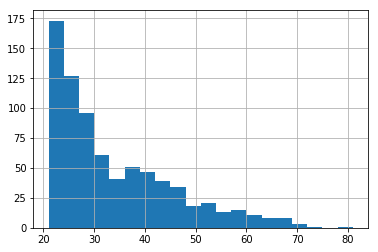

In [19]:
diabetes['Age'].hist(bins=20)

In [22]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [23]:
feat_cols = [num_preg,glu_con,bld_press,triceps,insulin,bmi,pedigree,age_bucket]

In [24]:
x_data = diabetes.drop('Class',axis=1)

In [26]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [27]:
label = diabetes['Class']

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_data, label, test_size=0.30, random_state=101)

In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,num_epochs=1000,batch_size=10,shuffle=True)

In [32]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11d43fc90>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpJ3eOmF', '_save_summary_steps': 100}


In [33]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpJ3eOmF/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 265.491
INFO:tensorflow:loss = 8.01114, step = 101 (0.379 sec)
INFO:tensorflow:global_step/sec: 358.665
INFO:tensorflow:loss = 6.46298, step = 201 (0.277 sec)
INFO:tensorflow:global_step/sec: 364.345
INFO:tensorflow:loss = 5.87602, step = 301 (0.280 sec)
INFO:tensorflow:global_step/sec: 384.107
INFO:tensorflow:loss = 6.06326, step = 401 (0.257 sec)
INFO:tensorflow:global_step/sec: 320.979
INFO:tensorflow:loss = 5.15575, step = 501 (0.309 sec)
INFO:tensorflow:global_step/sec: 337.44
INFO:tensorflow:loss = 5.76618, step = 601 (0.303 sec)
INFO:tensorflow:global_step/sec: 382.602
INFO:tensorflow:loss = 6.64122, step = 701 (0.266 sec)
INFO:tensorflow:global_step/sec: 377.146
INFO:tensorflow:loss = 5.56137, step = 801 (0.257 sec)
INFO:tensorflow:global_step/sec

In [34]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1000,shuffle=False)

In [35]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-11-21-14:46:25
INFO:tensorflow:Restoring parameters from /var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpJ3eOmF/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-21-14:47:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.797901, auc_precision_recall = 0.648353, average_loss = 0.526467, global_step = 1000, label/mean = 0.350649, loss = 5.26467, prediction/mean = 0.36004


In [36]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79790127,
 'auc_precision_recall': 0.64835274,
 'average_loss': 0.52646685,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.264668,
 'prediction/mean': 0.36003995}

In [37]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [38]:
predictions = model.predict(pred_input_func)

In [39]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpJ3eOmF/model.ckpt-1000


In [46]:
my_pred

[{'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.48221552], dtype=float32),
  'logits': array([-0.07116783], dtype=float32),
  'probabilities': array([ 0.51778442,  0.48221552], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array(['1'], dtype=object),
  'logistic': array([ 0.62723809], dtype=float32),
  'logits': array([ 0.52038622], dtype=float32),
  'probabilities': array([ 0.37276193,  0.62723809], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.36730105], dtype=float32),
  'logits': array([-0.54381287], dtype=float32),
  'probabilities': array([ 0.63269895,  0.36730105], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['0'], dtype=object),
  'logistic': array([ 0.30589354], dtype=float32),
  'logits': array([-0.81938821], dtype=float32),
  'probabilities': array([ 0.69410646,  0.30589354], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array(['

## DNN model

In [42]:
embedded_group_col = tf.feature_column.embedding_column(group,dimension=4)

In [43]:
feat_cols = [num_preg,glu_con,bld_press,triceps,insulin,bmi,pedigree,embedded_group_col,age_bucket]

In [44]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11dec0190>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpBLwU6Q', '_save_summary_steps': 100}


In [50]:
dnn_model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpBLwU6Q/model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into /var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpBLwU6Q/model.ckpt.
INFO:tensorflow:loss = 5.20223, step = 1001
INFO:tensorflow:global_step/sec: 310.767
INFO:tensorflow:loss = 6.54024, step = 1101 (0.323 sec)
INFO:tensorflow:global_step/sec: 420.255
INFO:tensorflow:loss = 5.8411, step = 1201 (0.238 sec)
INFO:tensorflow:global_step/sec: 414.57
INFO:tensorflow:loss = 2.11838, step = 1301 (0.243 sec)
INFO:tensorflow:global_step/sec: 407.07
INFO:tensorflow:loss = 6.01179, step = 1401 (0.246 sec)
INFO:tensorflow:global_step/sec: 550.239
INFO:tensorflow:loss = 4.49942, step = 1501 (0.185 sec)
INFO:tensorflow:global_step/sec: 425.949
INFO:tensorflow:loss = 1.32823, step = 1601 (0.233 sec)
INFO:tensorflow:global_step/sec: 393.383
INFO:tensorflow:loss = 3.52604, step = 1701 (0.254 sec)

In [48]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs=1000,shuffle=False)

In [51]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-11-21-15:06:23
INFO:tensorflow:Restoring parameters from /var/folders/1q/r0qwrpdd7h1d01b7r9cgsjy40000gp/T/tmpBLwU6Q/model.ckpt-6000
INFO:tensorflow:Finished evaluation at 2017-11-21-15:07:10
INFO:tensorflow:Saving dict for global step 6000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.822222, auc_precision_recall = 0.745843, average_loss = 0.513677, global_step = 6000, label/mean = 0.350649, loss = 5.13677, prediction/mean = 0.369712


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82222223,
 'auc_precision_recall': 0.74584258,
 'average_loss': 0.51367658,
 'global_step': 6000,
 'label/mean': 0.35064936,
 'loss': 5.136766,
 'prediction/mean': 0.36971223}